# <span style="color:#6495ED">**Predicció de Malalties Cardíaques**</span>

Víctor Moreno Borràs, Seminari de Machine Learning, ETSETB, UPC. 2023

> Enllaç a la competició: https://www.kaggle.com/competitions/hearth-disease-prediction
> 
> Enllaç al informe:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score
from sklearn.metrics import make_scorer, f1_score
from sklearn.model_selection import GridSearchCV

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier

### <span style="color:#6495ED">**1. Divisió de les Dades en Entrenament i Prova**</span>

En aquest bloc de codi, es realitza la divisió de les dades en conjunts d'entrenament i prova utilitzant la funció `train_test_split`.

In [4]:
path = '/home/victhor02/Desktop/doc/3B/apa/hearth-disease-predictor/data/'
train = pd.read_csv(path + 'sheart_train_ok.csv')
test = pd.read_csv(path + 'sheart_test_ok.csv')

X = train.drop('chd', axis=1)
y = train['chd']

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### <span style="color:#6495ED">**2. Avaluació de diversos models d'aprenentatge supervisat**</span>

En aquest segon apartat, es farà una primera avaluació de diversos models d'aprenenatge autòmatic, per trobar aquells que tenen un millor comportament en funció de la **F1-score**. Els models que es provaran en aquesta selecció son:

* RandomForestClassifier
* LogisticRegression
* SVC
* DecisionTreeClassifier
* GaussianNB
* KNeighborsClassifier
* AdaBoostClassifier


  
---
---

Cada estimador s'associa amb una tupla que consisteix en el model de classificació i un diccionari de hiperparàmetres amb els seus valors possibles. Això permetrà explorar diferents combinacions d'estimadors i hiperparàmetres per trobar la millor configuració per al nostre problema de classificació específic.

In [5]:
estimators = [
    (RandomForestClassifier(), {'n_estimators': [10, 50, 100], 'max_depth': [None, 5, 10]}),
    (LogisticRegression(), {'C': [0.1, 1, 10]}),
    (SVC(), {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}),
    (DecisionTreeClassifier(), {'max_depth': [None, 5, 10]}),
    (GaussianNB(), {}),
    (KNeighborsClassifier(), {'n_neighbors': [3, 5, 7]}),
    (AdaBoostClassifier(), {'n_estimators': [50, 100, 200]}),
]

In [6]:
estimator_names = []
accuracy_scores = []
recall_scores = []
f1_scores = []

for estimator, param_grid in estimators:
    grid_search = GridSearchCV(estimator, param_grid)
    grid_search.fit(X_train, y_train)    
    best_estimator = grid_search.best_estimator_
    
    best_estimator.fit(X_train, y_train)
    y_pred = best_estimator.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    estimator_names.append(best_estimator.__class__.__name__)
    accuracy_scores.append(accuracy)
    recall_scores.append(recall)
    f1_scores.append(f1)

/usr/lib/python3/dist-packages/sklearn/linear_model/_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/lib/python3/dist-packages/sklearn/linear_model/_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

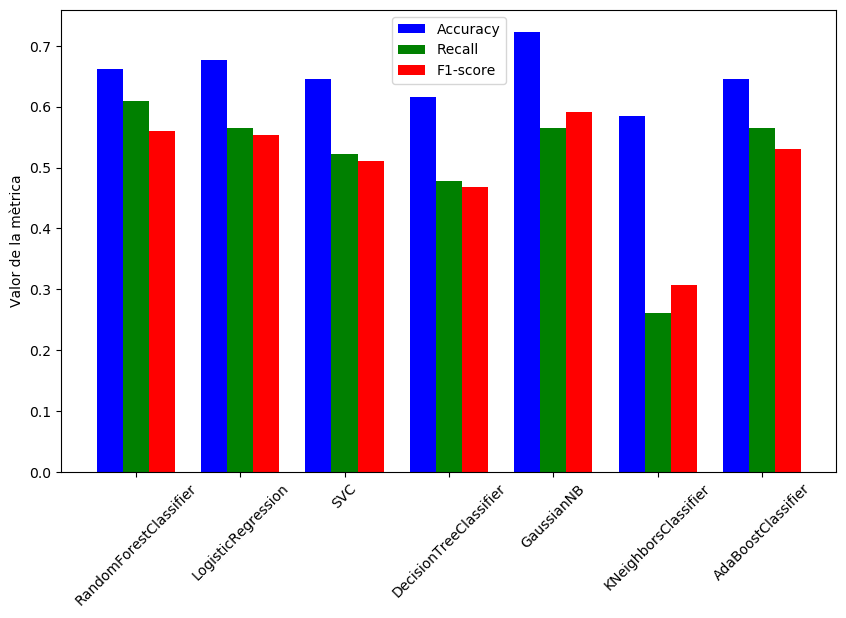

In [7]:
# Configurar el gráfico de barras
plt.figure(figsize=(10, 6))
x = range(len(estimator_names))
bar_width = 0.25

# Graficar las barras de las métricas de evaluación
plt.bar(x, accuracy_scores, width=bar_width, label='Accuracy', color='b')
plt.bar([i + bar_width for i in x], recall_scores, width=bar_width, label='Recall', color='g')
plt.bar([i + 2 * bar_width for i in x], f1_scores, width=bar_width, label='F1-score', color='r')

# Configurar las etiquetas del eje x y el título del gráfico
plt.ylabel('Valor de la mètrica')
plt.xticks([i + bar_width for i in x], estimator_names, rotation=45)
plt.legend()

# Mostrar el gráfico
plt.show()

Ens quedem amb els tres millors models.

In [8]:
f1 = np.array(f1_scores)
estimator_name = np.array(estimator_names)
indices_top3 = np.argsort(f1)[-3:]

for indice in indices_top3:
    print("Estimador:", estimator_name[indice])
    print("F1-score:", f1[indice])
    print("-----------------------")

Estimador: LogisticRegression
F1-score: 0.5531914893617021
-----------------------
Estimador: RandomForestClassifier
F1-score: 0.5599999999999999
-----------------------
Estimador: GaussianNB
F1-score: 0.5909090909090909
-----------------------


### <span style="color:#6495ED">**3. Logistic Regression**</span>

In [9]:
lr_model = LogisticRegression()  
lr_model.fit(X_train, y_train)

/usr/lib/python3/dist-packages/sklearn/linear_model/_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

#### Visualització de la Importància de les Variables

   Es calcula la importància de les variables utilitzant el model de regressió logística (`lr_model`) i es guarda en la variable `importancia_variables`. Aquesta importància és calculada utilitzant la magnitud dels coeficients del model (`np.abs(lr_model.coef_[0])`).


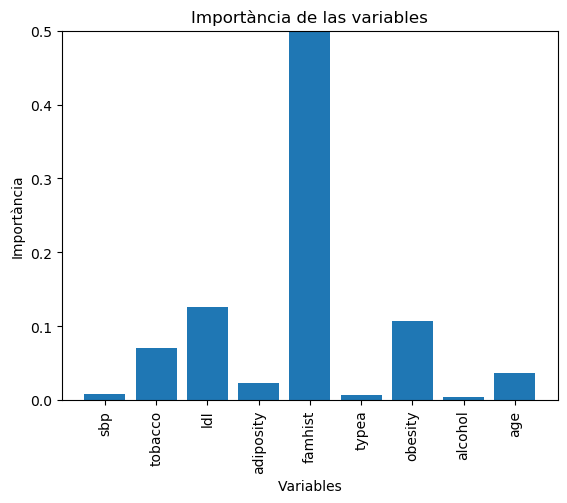

In [10]:
nombres_variables = ['sbp', 'tobacco', 'ldl', 'adiposity', 'famhist', 'typea', 'obesity', 'alcohol', 'age']
importancia_variables = np.abs(lr_model.coef_[0])

# Crear un array de posiciones para las barras
posiciones = np.arange(len(nombres_variables))

# Plotear las barras de importancia
plt.bar(posiciones, importancia_variables)

# Añadir etiquetas a las barras
plt.xticks(posiciones, nombres_variables, rotation='vertical')

# Añadir título y etiquetas a los ejes
plt.title('Importància de las variables')
plt.xlabel('Variables')
plt.ylabel('Importància')
plt.ylim(0, 0.5) 

# Mostrar el gráfico
plt.show()

#### Preparació de les Dades

En aquest bloc de codi es realitza la preparació de les dades per a l'entrenament i avaluació del model de Regressió Loigítica. 

* Eliminació de Columnes (si es requereix):
   Si la variable `remove` és certa, es remouen les columnes 'sbp', 'typea' i 'alcohol' de les dades d'entrenament i de prova. L'elecció  d'aquestes caracterítiques es deguda a l'estudi al bloc de codi anterior.

* Divisió de les Dades d'Entrenament i Validació (si es requereix):
   Si la variable `validation` és certa, una part de les dades de `train` es guardarà com a dades de `validació`. Aquest bloc de dades sùtilitzarà psoteriorment per optimitzar la frontera de decisió $\gamma$.

In [25]:
remove = False
validation = True

path = '/home/victhor02/Desktop/doc/3B/apa/hearth-disease-predictor/data/'
data = pd.read_csv(path + 'sheart_train_ok.csv')
test = pd.read_csv(path + 'sheart_test_ok.csv')

if(remove):  X = data.drop(['sbp','typea','alcohol','chd'], axis=1)
else:  X = data.drop('chd', axis=1)

if(remove): test = test.drop(['sbp','typea','alcohol'], axis=1)

y = data['chd']

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)
if(validation): X_train,X_validation,y_train,y_validation = train_test_split(X_train, y_train, test_size=0.15, random_state=42)

In [26]:
param_grid = {
    'penalty': ['l1', 'l2'],  # Tipo de regularización (L1 o L2)
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 2000],  # Inverso de la fuerza de regularización
    'solver': ['liblinear', 'saga'],  # Algoritmo de optimización
    'max_iter': [100, 200, 500]  # Número máximo de iteraciones
}


clf_rand = GridSearchCV(lr_model, param_grid, cv=4,scoring=make_scorer(f1_score)) 
clf_rand.fit(X_train, y_train )

/usr/lib/python3/dist-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/usr/lib/python3/dist-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/usr/lib/python3/dist-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/usr/lib/python3/dist-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/usr/lib/python3/dist-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter w

GridSearchCV(cv=4, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 2000],
                         'max_iter': [100, 200, 500], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(f1_score), verbose=0)

In [27]:
lr = clf_rand.best_estimator_
clf_rand.best_params_

{'C': 100, 'max_iter': 200, 'penalty': 'l1', 'solver': 'liblinear'}

In [28]:
lr.fit(X_train,y_train) # fit random forest on x and y

y_pred_lr = lr.predict(X_test)
print(accuracy_score(y_test, y_pred_lr))
print(f1_score(y_test, y_pred_lr))
cmat = confusion_matrix(y_test,y_pred_lr)
print(cmat)

0.6461538461538462
0.5306122448979592
[[29 13]
 [10 13]]


#### Curva Precision-Recall

Obtenim el valor de la `F1-score` en funció de la frontera de descisó $\gamma$ i ens quedem amb el valor que la maximitza.

0.5126900490228714


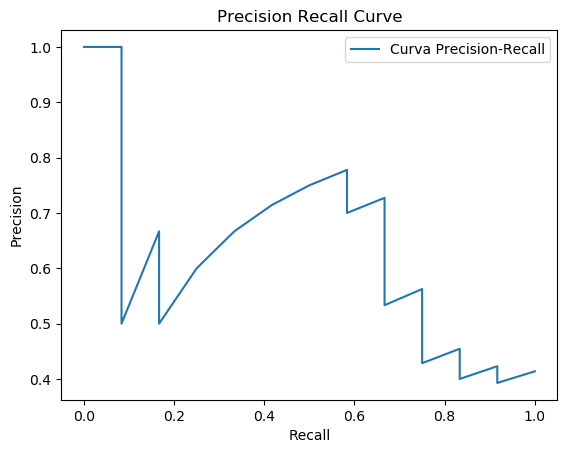

In [15]:
from sklearn.metrics import precision_recall_curve

if(validation): 
    y_prob = lr.predict_proba(X_validation)[:, 1]

    precision, recall, umbrales = precision_recall_curve(y_validation, y_prob)
    f1_scores = 2 * (precision * recall) / (precision + recall)
    mejor_umbral = umbrales[np.argmax(f1_scores)]
    print(mejor_umbral)
    # Trazar la curva de precisión y recuperación
    plt.plot(recall, precision, label='Curva Precision-Recall')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision Recall Curve')
    plt.legend()
    plt.show()


In [16]:
if(validation):
    y_prob_test = lr.predict_proba(X_test)[:,1]
    y_pred = (y_prob_test >= mejor_umbral).astype(int)
    print(accuracy_score(y_test, y_pred))
    print(f1_score(y_test, y_pred))
    print(recall_score(y_test, y_pred))
    cmat = confusion_matrix(y_test,y_pred)
    print(cmat)

0.6615384615384615
0.5416666666666667
0.5652173913043478
[[30 12]
 [10 13]]


### <span style="color:#6495ED">**4. Gaussian Naive Bayes**</span>

In [17]:
path = '/home/victhor02/Desktop/doc/3B/apa/hearth-disease-predictor/data/'
train = pd.read_csv(path + 'sheart_train_ok.csv')
test = pd.read_csv(path + 'sheart_test_ok.csv')

X = train.drop('chd', axis=1)
y = train['chd']

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred_gnb))
print(f1_score(y_test, y_pred_gnb))
cmat = confusion_matrix(y_test,y_pred_gnb)
print(cmat)

0.7230769230769231
0.5909090909090909
[[34  8]
 [10 13]]


### <span style="color:#6495ED">**5. Random Forest**</span>

In [19]:
rnf_model = RandomForestClassifier()
rnf_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [20]:
# Obtener la importancia de cada variable
importancia_variables = rnf_model.feature_importances_

# Crear un diccionario que asocie el nombre de cada variable con su importancia
dict_importancia = dict(zip(nombres_variables, importancia_variables))

# Imprimir la importancia de cada variable en orden descendente
for nombre, importancia in sorted(dict_importancia.items(), key=lambda x: x[1], reverse=True):
    print(f'{nombre}: {importancia}')

age: 0.1386001157245056
ldl: 0.12816116331065203
tobacco: 0.12187587116732539
famhist: 0.12090751211555506
adiposity: 0.11090741305188018
typea: 0.10845762866779525
sbp: 0.10264437817780946
obesity: 0.09838195911307972
alcohol: 0.07006395867139735


In [21]:
param_grid = [{'n_estimators': [50,100,200],
                'max_depth': range(2,30),
                'max_features':['sqrt',0.2],
                'criterion':['gini','entropy']}] 


clf_rand = GridSearchCV(rnf_model, param_grid, cv=2,scoring=make_scorer(f1_score)) 
clf_rand.fit(X_train, y_train)

GridSearchCV(cv=2, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [22]:
rf = clf_rand.best_estimator_
clf_rand.best_params_

{'criterion': 'gini',
 'max_depth': 23,
 'max_features': 'sqrt',
 'n_estimators': 50}

In [23]:
rf.fit(X_train,y_train) # fit random forest on x and y

y_pred_lr = rf.predict(X_test)
print(accuracy_score(y_test, y_pred_lr))
print(f1_score(y_test, y_pred_lr))
cmat = confusion_matrix(y_test,y_pred_lr)
print(cmat)

0.6615384615384615
0.5416666666666667
[[30 12]
 [10 13]]


### <span style="color:#6495ED">**6. Voting**</span>

In [29]:
from sklearn.ensemble import VotingClassifier
voting_hard = VotingClassifier(
    estimators=[('lr', lr), ('gnb', gnb), ('rf', rf)],
    voting='hard'  
)
voting_hard.fit(X_train, y_train)

voting_soft = VotingClassifier(
    estimators=[('lr', lr), ('gnb', gnb), ('rf', rf)],
    voting='soft'  
)
voting_soft.fit(X_train, y_train)

models = [('lr', lr), ('gnb', gnb), ('rf', rf), ('hard voting', voting_hard), ('soft voting', voting_soft)]

for name, model in models:
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    confusion_mat = confusion_matrix(y_test, y_pred)

    print(f'Model: {name}')
    print(f'Accuracy: {accuracy}')
    print(f'F1-score: {f1}')
    print(f'Recall: {recall}')
    print('Confusion Matrix:')
    print(confusion_mat)
    print('------------------------')

Model: lr
Accuracy: 0.6461538461538462
F1-score: 0.5306122448979592
Recall: 0.5652173913043478
Confusion Matrix:
[[29 13]
 [10 13]]
------------------------
Model: gnb
Accuracy: 0.7230769230769231
F1-score: 0.5909090909090909
Recall: 0.5652173913043478
Confusion Matrix:
[[34  8]
 [10 13]]
------------------------
Model: rf
Accuracy: 0.6615384615384615
F1-score: 0.5416666666666667
Recall: 0.5652173913043478
Confusion Matrix:
[[30 12]
 [10 13]]
------------------------
Model: hard voting
Accuracy: 0.6461538461538462
F1-score: 0.5306122448979592
Recall: 0.5652173913043478
Confusion Matrix:
[[29 13]
 [10 13]]
------------------------
Model: soft voting
Accuracy: 0.676923076923077
F1-score: 0.5714285714285715
Recall: 0.6086956521739131
Confusion Matrix:
[[30 12]
 [ 9 14]]
------------------------


#### Entrega

In [30]:
model = voting_soft
y_pred = model.predict(test)

In [31]:
data = pd.read_csv("/home/victhor02/Desktop/doc/3B/apa/hearth-disease-predictor/data/sheart_test_ok.csv")
indexes = data.index
indexes = np.add(indexes, 1)
y_pred_format = pd.DataFrame(y_pred,columns=['Label'])
y_pred_format.insert(0, 'Id', indexes)
y_pred_format.to_csv('/home/victhor02/Desktop/doc/3B/apa/hearth-disease-predictor/data/submission_test.csv', index=False)